# Curso de Machine Learning - Udemy

## Pré-processamento de Dados

### Importação das bibliotecas

In [852]:
# %pip install pandas
# %pip install seaborn
# %pip install plotly
# %pip install networkx
# %pip install yellowbrick
# %pip install pyarrow
# %pip install numpy==1.24.0
# %pip install nbformat
# %pip install --upgrade jupyter

In [853]:
import pandas
import numpy
import seaborn
import matplotlib.pyplot
import plotly.express
import networkx
import yellowbrick


from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.naive_bayes import GaussianNB

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from yellowbrick.classifier import ConfusionMatrix

### Base de dados de crédito

* Fonte (adatpada): https://www.kaggle.com/laotse/credit-risk-dataset

In [854]:
base_credit = pandas.read_csv('Bases de dados/credit_data.csv')

- Importando a base de dados.

In [855]:
base_credit

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


- Executando a base de dados.

In [856]:
base_credit.head()

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


- Pegandos os primeiros registros da base de dados.

In [857]:
base_credit.tail()

,clientid,income,age,loan,default
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0
1999,2000,69436.579552,56.152617,7378.833599,0


- Pegandos os últimos registros da base de dados.

In [858]:
base_credit.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


- Retorna uma descrição em forma de contagem do elementos.

### Visualização dos dados

In [859]:
numpy.unique(base_credit['default'], return_counts = True)


(array([0, 1]), array([1717,  283]))

- `unique` retorna os valores únicos de uma coluna;
- `return_counts = True` retorna a quantidade dos valores que se encaixam no unique.

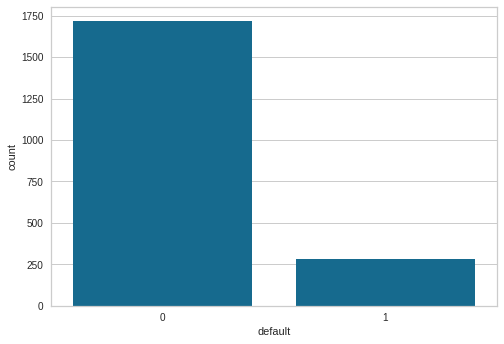

In [860]:
seaborn.countplot(x = base_credit['default']);

- Gera um gráfico de barra para os valores pedidos;
- O ";" limpa a saída de textos poluídos.

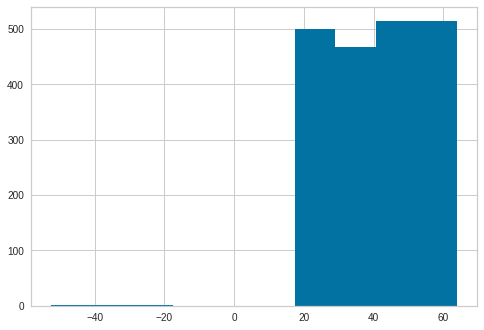

In [861]:
matplotlib.pyplot.hist(x =  base_credit['age']);

- Gera um histograma dos valores pedidos, nesse exemplo, um histograma com as idades na base de cŕedito.

In [862]:
grafico = plotly.express.scatter_matrix(base_credit, dimensions = ['age', 'income', 'loan'], color = 'default')
grafico.show()

- Gera um gráfico interativo de acordo com os parâmetros inseridos

### Tratamento de valores inconsistentes

In [863]:
base_credit.loc[base_credit['age'] < 0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


- Olhando as idades inválidas (abaixo de zero)

In [864]:
base_credit.mean()

clientid     1000.500000
income      45331.600018
age            40.807559
loan         4444.369695
default         0.141500
dtype: float64

- Pegando a média dos valores da base de cŕedito, porém dessa forma, todos os valores estão tendo suas médias inclusas e só queremos as médias de idades para preencher os valores inválidos.

In [865]:
base_credit['age'][base_credit['age'] > 0].mean()

40.92770044906149

- Forma correta de pegar a média sem considerar as idades inválidas

- Forma errada de alterar os dados inválidos pela média

   **base_credit.loc[base_credit['age'] < 0] = 40.92**

- Dessa forma, a linha inteira vai ser alterada para o valor inserido

In [866]:
base_credit.loc[base_credit['age'] < 0, 'age'] = 40.92

- Forma correta de alterar dados inválidos

### Tratamentos de valores faltantes

In [867]:
base_credit.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

- Forma de olhar os valores faltantes, se for 0 é válido, se for 1, então existe algum valor faltante

In [868]:
base_credit.loc[pandas.isnull(base_credit['age'])]

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


- Forma de localizar os valores nulos

In [869]:
base_credit['age'].fillna(base_credit['age'].mean(), inplace = True)

/tmp/ipykernel_16957/1787667511.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





- Forma de preencher os valores nulos com a média das idades

In [870]:
base_credit.loc[(base_credit['clientid'].isin([29, 31, 32]))]

,clientid,income,age,loan,default
28,29,59417.805406,40.927689,2082.625938,0
30,31,48528.852796,40.927689,6155.784670,0
31,32,23526.302555,40.927689,2862.010139,0


- Forma simples de localizar os elementos em um intervalo

### Divisão entre previsores e classe

No aprendizado de máquina supervisionado, os dados de entrada podem ser divididos em dois grupos
- X: são os atributos que vão ser utilizados para determinar a classe de saída. Esses atributos também podem ser chamados de previsores.
- Y: é o atributo para o qual se deseja fazer a predição do valor de saída (também chamado de atributo-alvo)

In [871]:
X_credit = base_credit.iloc[:, 1:4].values

- Pegando os valores e as colunas especificadas nesse intervalo e colocando-os na variável `X`, nesse caso, `X_credit`.
- `values` é usado para converter os dados para um formato melhor de se trabalhar pelo computador.

In [872]:
X_credit

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

- Mostrando os valores que estão atualmente na variável `X`.

In [873]:
type(X_credit)

numpy.ndarray

- Mostrando o tipo atual desse formato de dados.

In [874]:
Y_credit = base_credit.iloc[:, 4].values

- Fazendo a atribuição da classe ou atributo-alvo em `Y`, nesse caso, `Y_credit`.

In [875]:
Y_credit

array([0, 0, 0, ..., 1, 0, 0])

- Mostrando os valores que estão atualmente na variável `Y`.

In [876]:
type(Y_credit)

numpy.ndarray

- Mostrando o tipo atual desse formato de dados.

### Escalonamento de valores

Os algoritmos de aprendizado de máquina tendem a favorecer os dados de tamanhos maiores e deixar de lado os dados com valores menores, atribuindo maior peso e importância para os dados com valores maiores.

Quase nunca isso é uma coisa boa, por isso, temos técnicas que ajudam a equalizar melhor os pesos que cada dado deve ter.

Os seguintes cálculos ajudam nesse problema: 

**Padronização** (Standardisation)

$x = \dfrac{x - média(x)}{desviopadrão(x)}$

**Normalização** (Normalization)

$x = \dfrac{x - mínimo(x)}{máximo(x) - mínimo(x)}$

In [877]:
scaler_credit = StandardScaler()
X_credit = scaler_credit.fit_transform(X_credit)

X_credit[:,0].min(), X_credit[:,1].min(), X_credit[:,2].min()

(-1.7676158019964077, -1.7264145408889917, -1.4592791099462408)

- A partir da biblioteca Sklearn, importamos a função que vai padronizar nossos dados
- Pegamos os menores valores de cada coluna (atributo) da nossa base de dados

In [878]:
X_credit

array([[ 1.45393393,  1.36538093,  1.20281942],
       [-0.76217555,  0.5426602 ,  0.69642695],
       [ 0.83682073,  1.67417189,  1.17471147],
       ...,
       [-0.07122592, -0.97448519,  0.35420081],
       [-0.11000289,  1.73936739, -0.92675625],
       [ 1.682986  ,  1.14917639,  0.96381038]])

- Podemos ver que agora dos dados da nossa base estão na mesma escala.
- Dizemos que esses dados estão escalonados

### Base de dados do censo

- Fonte: http://archive.ics.uci.edu/ml/datasets/adult

### Esploração dos dados 


In [879]:
base_census = pandas.read_csv('Bases de dados/census.csv')

In [880]:
base_census

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [881]:
base_census.describe()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Com a função `describe` podemos ver um quado geral dos dados da nossa base

In [882]:
base_census.isnull().sum()

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

Usando `isnull` e `sum` podemos verificar se temos dados faltantes e/ou negativos, o que não é o caso para essa base de dados do census

### Visualização de dados

In [883]:
numpy.unique(base_census['income'], return_counts = True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

- Usando a chamada acima, podemos pegar os valores referentes ao atributo `income (renda)` e a quantidade de dados que atendem a esses valores  

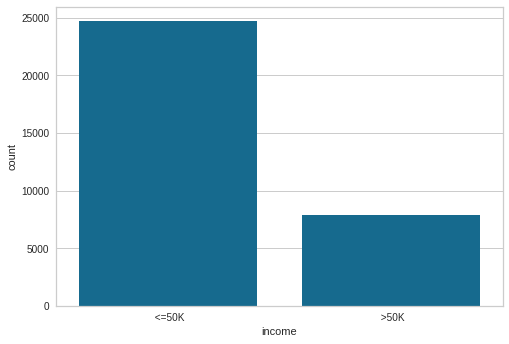

In [884]:
seaborn.countplot(x = base_census['income']);

- Podemos considerar esses tipos de dados como `desbalanceados` por termos uma quantidade muito maior de um tipo de dado em relação ao outro

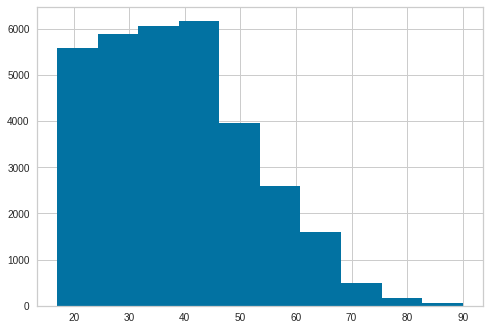

In [885]:
matplotlib.pyplot.hist(x = base_census['age']);

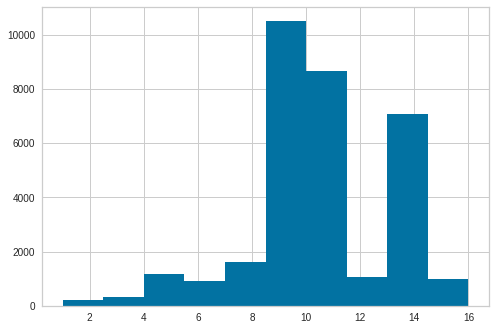

In [886]:
matplotlib.pyplot.hist(x = base_census['education-num']);

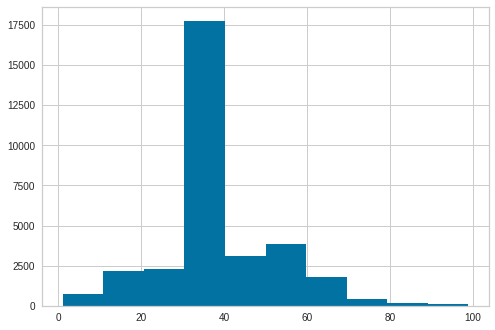

In [887]:
matplotlib.pyplot.hist(x = base_census['hour-per-week']);

In [888]:
grafico = plotly.express.treemap(base_census, path = ['workclass', 'age', 'income']);
grafico.show()

- Como mostrado acima, a função `treemap` mostra as hierarquias dos dados usando vários quadrados aninhados

In [889]:
grafico = plotly.express.parallel_categories(base_census, dimensions = ['occupation', 'relationship']);
grafico.show()

- A função `parallel_categories` consegue relacionar os dados de dois atributos distintos e mostrar isso em um gráfico

### Divisão entre previsores e classes

In [890]:
base_census.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'income'],
      dtype='object')

In [891]:
X_census = base_census.iloc[:, 0:14].values
X_census

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

- A função `iloc` é uma função do `pandas` usada para selecionar dados com base em sua posição numérica.
- `dataframe.iloc[linhas, colunas]`

- No caso, `X_census` está pegando todas as linhas e até a coluna 13, sem pegar a coluna 14 que é a `renda (income)`

In [892]:
Y_census = base_census.iloc[:, 14].values
Y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

### Tratamento de atributos categóricos

#### LabelEncoder

- A função `fit_transform` ajusta o modelo de treinamento e em seguida aplica uma transformaçãono modelo
- A função `LabelEncoder` transforma `rótulos (dados categóricos)` em dados numéricos

In [893]:
X_census[:, 1]

array([' State-gov', ' Self-emp-not-inc', ' Private', ..., ' Private',
       ' Private', ' Self-emp-inc'], dtype=object)

In [894]:
label_encoder_teste = LabelEncoder()
label_encoder_teste

LabelEncoder()

In [895]:
teste = label_encoder_teste.fit_transform(X_census[:, 1])
teste

array([7, 6, 4, ..., 4, 4, 5])

In [896]:
X_census[0]

array([39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40,
       ' United-States'], dtype=object)

In [897]:
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

In [898]:
X_census[:, 1] = label_encoder_workclass.fit_transform(X_census[:, 1])
X_census[:, 3] = label_encoder_education.fit_transform(X_census[:, 3])
X_census[:, 5] = label_encoder_marital.fit_transform(X_census[:, 5])
X_census[:, 6] = label_encoder_occupation.fit_transform(X_census[:, 6])
X_census[:, 7] = label_encoder_relationship.fit_transform(X_census[:, 7])
X_census[:, 8] = label_encoder_race.fit_transform(X_census[:, 8])
X_census[:, 9] = label_encoder_sex.fit_transform(X_census[:, 9])
X_census[:, 13] = label_encoder_country.fit_transform(X_census[:, 13])

In [899]:
X_census[0]

array([39, 7, 77516, 9, 13, 4, 1, 1, 4, 1, 2174, 0, 40, 39], dtype=object)

#### OneHotEncoder

In [900]:
len(numpy.unique(base_census['workclass']))

9

In [901]:
OneHotEncoder_census = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1, 3, 5, 6, 7, 8, 9, 13])], remainder='passthrough')

In [902]:
X_census = OneHotEncoder_census.fit_transform(X_census).toarray()

In [903]:
X_census.shape

(32561, 108)

#### Escalonamento dos valores

In [904]:
scaler_census = StandardScaler()
X_census = scaler_census.fit_transform(X_census)

In [905]:
X_census

array([[-0.2444502 , -0.17429511, -0.26209736, ...,  0.1484529 ,
        -0.21665953, -0.03542945],
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -2.22215312],
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -0.03542945],
       ...,
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -0.03542945],
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -1.65522476],
       [-0.2444502 , -0.17429511, -0.26209736, ...,  1.88842434,
        -0.21665953, -0.03542945]])

### Divisão das bases em treinamento e teste

### Credit data

In [906]:
X_credit_treinamento, X_credit_teste, Y_credit_treinamento, Y_credit_teste = train_test_split(X_credit, Y_credit, test_size=0.25, random_state=0)

### Census data

In [907]:
X_census_treinamento, X_census_teste, Y_census_treinamento, Y_census_teste = train_test_split(X_census, Y_census, test_size=0.15, random_state=0)

### Salvar as variáveis

In [908]:
import pickle

In [909]:
with open('credit.pkl', mode='wb') as f:
    pickle.dump([X_credit_treinamento, Y_credit_treinamento, X_credit_teste, Y_credit_teste], f)

In [910]:
with open('census.pkl', mode='wb') as f:
    pickle.dump([X_census_treinamento, Y_census_treinamento, X_census_teste, Y_census_teste], f) 

## Aprendizagem Bayesiana

### Naive Bayes (extra)

- O algoritmo ``Naive Bayes`` é um classificador probabilístico que assume que as ``características (features)`` são independentes entre si, daí o termo ``“naive” (ingênuo)``. Essa é uma simplificação feita para facilitar o cálculo das probabilidades condicionais necessárias para classificação.

$P(A|B) = \dfrac{P(B|A) \ P(A)}{P(B)}$

- Na prática, o algoritmo Naive Bayes é frequentemente utilizado para classificar textos, como na detecção de spam ou na categorização de documentos. Ele usa a frequência das palavras para calcular a probabilidade de um documento pertencer a uma determinada classe (por exemplo, spam ou não spam).

- Embora o algoritmo Naive Bayes seja simples e rápido, nem sempre é o classificador mais preciso, principalmente quando as características são altamente correlacionadas. No entanto, em muitos casos, o Naive Bayes pode fornecer resultados satisfatórios com um pequeno número de dados de treinamento.

In [911]:
# Criando o dataframe de exemplo
dados = {
    'temperatura': [30, 25, 28, 18, 20, 22, 24, 28, 26, 30],
    'umidade': [85, 90, 78, 65, 75, 70, 80, 75, 80, 70],
    'jogar_tenis': ['Não', 'Não', 'Sim', 'Sim', 'Sim', 'Sim', 'Não', 'Sim', 'Sim', 'Não']
}

df = pandas.DataFrame(dados)
print(df)

   temperatura  umidade jogar_tenis
0           30       85         Não
1           25       90         Não
2           28       78         Sim
3           18       65         Sim
4           20       75         Sim
5           22       70         Sim
6           24       80         Não
7           28       75         Sim
8           26       80         Sim
9           30       70         Não


In [912]:
# Separando as variáveis de entrada (temperatura e umidade) e o alvo (jogar_tenis)
X = df[['temperatura', 'umidade']]
y = df['jogar_tenis']

# Dividindo o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Criando o modelo Naive Bayes Gaussiano
modelo = GaussianNB()

# Treinando o modelo
modelo.fit(X_train, y_train)

# Fazendo previsões
y_pred = modelo.predict(X_test)

# Calculando a acurácia do modelo
acuracia = accuracy_score(y_test, y_pred)
print(f'Acurácia: {acuracia * 100}%')

Acurácia: 75.0%


O ``test_size`` é um parâmetro que determina a proporção do conjunto de dados que será reservada para o conjunto de teste. Por exemplo, se test_size for definido como 0.2, isso significa que 20% dos dados serão usados como conjunto de teste, enquanto os 80% restantes serão usados como conjunto de treinamento. A escolha adequada do tamanho do conjunto de teste é importante para avaliar adequadamente o desempenho do modelo.

O ``random_state`` é um parâmetro opcional que permite que você fixe a semente (seed) usada pelo gerador de números aleatórios durante a divisão dos dados. Fixar a semente garante reprodutibilidade, ou seja, se você usar a mesma semente, obterá a mesma divisão de dados em diferentes execuções do código. Isso é útil para garantir resultados consistentes ao compartilhar código ou ao tentar depurar.

### Naive Bayes (exemplos do curso)

### Base risco de crédito

In [913]:
base_risco_credito = pandas.read_csv('Bases de dados/risco_credito.csv')

In [914]:
base_risco_credito

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo
5,desconhecida,baixa,adequada,acima_35,baixo
6,ruim,baixa,nenhuma,0_15,alto
7,ruim,baixa,adequada,acima_35,moderado
8,boa,baixa,nenhuma,acima_35,baixo
9,boa,alta,adequada,acima_35,baixo


In [915]:
X_risco_credito = base_risco_credito.iloc[:, 0:4].values
X_risco_credito

array([['ruim', 'alta', 'nenhuma', '0_15'],
       ['desconhecida', 'alta', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'adequada', 'acima_35'],
       ['ruim', 'baixa', 'nenhuma', '0_15'],
       ['ruim', 'baixa', 'adequada', 'acima_35'],
       ['boa', 'baixa', 'nenhuma', 'acima_35'],
       ['boa', 'alta', 'adequada', 'acima_35'],
       ['boa', 'alta', 'nenhuma', '0_15'],
       ['boa', 'alta', 'nenhuma', '15_35'],
       ['boa', 'alta', 'nenhuma', 'acima_35'],
       ['ruim', 'alta', 'nenhuma', '15_35']], dtype=object)

In [916]:
Y_risco_credito = base_risco_credito.iloc[:, 4:5].values
Y_risco_credito

array([['alto'],
       ['alto'],
       ['moderado'],
       ['alto'],
       ['baixo'],
       ['baixo'],
       ['alto'],
       ['moderado'],
       ['baixo'],
       ['baixo'],
       ['alto'],
       ['moderado'],
       ['baixo'],
       ['alto']], dtype=object)

In [917]:
label_encoder_historia = LabelEncoder()
label_encoder_divida = LabelEncoder()
label_encoder_garantias = LabelEncoder()
label_encoder_renda = LabelEncoder()

In [918]:
X_risco_credito[:, 0] = label_encoder_historia.fit_transform(X_risco_credito[:, 0])
X_risco_credito[:, 1] = label_encoder_divida.fit_transform(X_risco_credito[:, 1])
X_risco_credito[:, 2] = label_encoder_garantias.fit_transform(X_risco_credito[:, 2])
X_risco_credito[:, 3] = label_encoder_renda.fit_transform(X_risco_credito[:, 3])

In [919]:
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [920]:
import pickle
with open('risco_credito.pkl', 'wb') as f:
    pickle.dump([X_risco_credito, Y_risco_credito], f)

In [921]:
naive_risco_credito = GaussianNB()
naive_risco_credito.fit(X_risco_credito, Y_risco_credito)                                   

/home/carlos/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



GaussianNB()

In [922]:
previsao = naive_risco_credito.predict([[0, 0, 1, 2], [2, 0, 0, 0]])
previsao

array(['baixo', 'moderado'], dtype='<U8')

In [923]:
naive_risco_credito.classes_

array(['alto', 'baixo', 'moderado'], dtype='<U8')

In [924]:
naive_risco_credito.class_count_

array([6., 5., 3.])

In [925]:
naive_risco_credito.class_prior_

array([0.42857143, 0.35714286, 0.21428571])

### Base credit data

In [926]:
import pickle
with open('credit.pkl', 'rb') as f:
    X_credit_treinamento, Y_credit_treinamento, X_credit_teste, Y_credit_teste = pickle.load(f)

In [927]:
X_credit_treinamento.shape, Y_credit_treinamento.shape

((1500, 3), (1500,))

In [928]:
X_credit_teste.shape, Y_credit_teste.shape

((500, 3), (500,))

In [929]:
naive_credit_data = GaussianNB()
naive_credit_data.fit(X_credit_treinamento, Y_credit_treinamento)

GaussianNB()

- Nos comandos acima, nós instânciamos o algoritmo de Naive Bayes com o método de Gauss.
- O comando `fit` faz o treinamento do algoritmo usando os parâmetros escolhidos e gera uma ``tabela de probabilidade``

- Com o algoritmo treinado, podemos usar o comando `predict` para fazer previsões de dados na nova base de dados
- Lembrando que os dados que serão usados para as previsões são os dados de ``teste`` e não os dados de `treinamento` 

In [930]:
previsoes = naive_credit_data.predict(X_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [931]:
accuracy_score(Y_credit_teste, previsoes)

0.938

In [932]:
confusion_matrix(Y_credit_teste, previsoes)

array([[428,   8],
       [ 23,  41]])

In [933]:
print(classification_report(Y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500



### Base census

In [934]:
with open('census.pkl', 'rb') as f:
    X_census_treinamento, Y_census_treinamento, X_census_teste, Y_census_teste = pickle.load(f)

In [935]:
X_census_treinamento.shape, Y_census_treinamento.shape

((27676, 108), (27676,))

In [936]:
naive_census_data = GaussianNB()
naive_census_data.fit(X_census_treinamento, Y_census_treinamento)

GaussianNB()

In [937]:
census_prev = naive_census_data.predict(X_census_teste)
census_prev

array([' >50K', ' >50K', ' >50K', ..., ' <=50K', ' >50K', ' >50K'],
      dtype='<U6')

In [938]:
accuracy_score(Y_census_teste, census_prev)

0.4767656090071648

In [939]:
confusion_matrix(Y_census_teste, census_prev)

array([[1172, 2521],
       [  35, 1157]])

In [940]:
print(classification_report(Y_census_teste, census_prev))

              precision    recall  f1-score   support

       <=50K       0.97      0.32      0.48      3693
        >50K       0.31      0.97      0.48      1192

    accuracy                           0.48      4885
   macro avg       0.64      0.64      0.48      4885
weighted avg       0.81      0.48      0.48      4885



0.4767656090071648

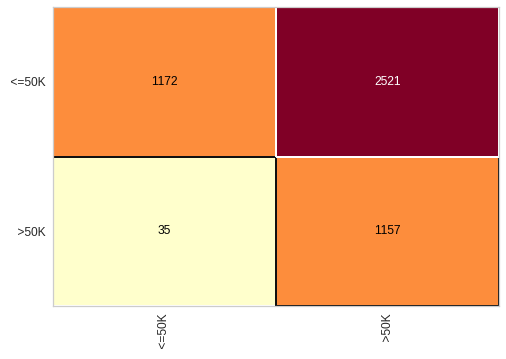

In [941]:
cm = ConfusionMatrix(naive_census_data)
cm.fit(X_census_treinamento, Y_census_treinamento)
cm.score(X_census_teste, Y_census_teste)

## Aprendizagem por Árvores de Decisão

Para gerarmos a árvore de decisão temos duas fórmulas que podem ser aplicadas: 
- Entropy (entropia)

    $Entropy(S) = \displaystyle\sum_{i=1}^{c}$ - $pi \cdot \log_2pi $

- Gain (ganho de informação)

Após gerarmos uma árvore de decisão, podemos aplicar modificações que chamamos de ``poda (podar uma ávore)`
- **Bias (viés)**

    * Erros por classificação errada

- **Variância**

    * Erros por sensibilidade pequena à mudanças na base de dados de treinamneto

    * Pode levar a ``Overfitting`` (quando o algoritmo se adapta demais a base de treinamento e quando vai para a base de teste comete muitos erros)

- **Vantagens**
    
    * Fácil interpretação

    * Não precisa de normalização ou padronização

    * Rápido para classificar novo registros

- **Desvantagens**

    * Geração de árvores muito complexas

    * Pequenas mudanças nos dados podem mudar a árvore (podar pode ajudar)

    * Problema ``NP-Completo`` para construir a árvore

- Era um método muito popular em meados dos anos 90

- Upgrades como ``random forest (florestas randômicas)`` melhoram o desempenho (usado no Kinect da microsoft)

- CART - Classification and Regression Tress (Ávores para Classficação e Regressão)

### Árvores de decisão

#### Base risco de crédito

In [942]:
import pickle

with open('risco_credito.pkl', 'rb') as f:
    X_risco_credito, Y_risco_credito = pickle.load(f)

In [943]:
arvore_risco_credito = DecisionTreeClassifier(criterion='entropy')
arvore_risco_credito.fit(X_risco_credito, Y_risco_credito)

DecisionTreeClassifier(criterion='entropy')

In [944]:
arvore_risco_credito.feature_importances_

array([0.3362078 , 0.14179499, 0.03885431, 0.4831429 ])

[Text(0.5, 0.9, 'x[3] <= 1.5\nentropy = 1.531\nsamples = 14\nvalue = [6, 5, 3]'),
 Text(0.2, 0.7, 'x[3] <= 0.5\nentropy = 0.863\nsamples = 7\nvalue = [5, 0, 2]'),
 Text(0.1, 0.5, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(0.3, 0.5, 'x[0] <= 0.5\nentropy = 1.0\nsamples = 4\nvalue = [2, 0, 2]'),
 Text(0.2, 0.3, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.4, 0.3, 'x[1] <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [2, 0, 1]'),
 Text(0.3, 0.1, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.5, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.8, 0.7, 'x[0] <= 1.5\nentropy = 1.149\nsamples = 7\nvalue = [1, 5, 1]'),
 Text(0.7, 0.5, 'x[0] <= 0.5\nentropy = 0.65\nsamples = 6\nvalue = [1, 5, 0]'),
 Text(0.6, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(0.8, 0.3, 'x[2] <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 2, 0]'),
 Text(0.7, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.1, 'entropy = 1.0\nsamples

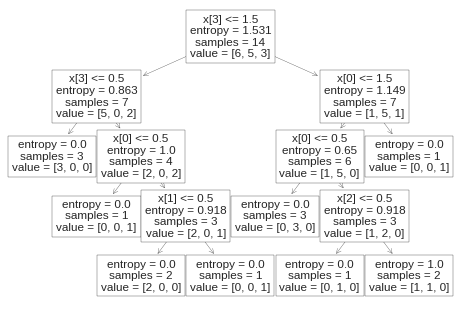

In [945]:
tree.plot_tree(arvore_risco_credito)

[Text(0.5, 0.9, 'renda <= 1.5\nentropy = 1.531\nsamples = 14\nvalue = [6, 5, 3]'),
 Text(0.2, 0.7, 'renda <= 0.5\nentropy = 0.863\nsamples = 7\nvalue = [5, 0, 2]'),
 Text(0.1, 0.5, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(0.3, 0.5, 'história <= 0.5\nentropy = 1.0\nsamples = 4\nvalue = [2, 0, 2]'),
 Text(0.2, 0.3, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.4, 0.3, 'dívida <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [2, 0, 1]'),
 Text(0.3, 0.1, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.5, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.8, 0.7, 'história <= 1.5\nentropy = 1.149\nsamples = 7\nvalue = [1, 5, 1]'),
 Text(0.7, 0.5, 'história <= 0.5\nentropy = 0.65\nsamples = 6\nvalue = [1, 5, 0]'),
 Text(0.6, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(0.8, 0.3, 'garantias <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 2, 0]'),
 Text(0.7, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.1, 'e

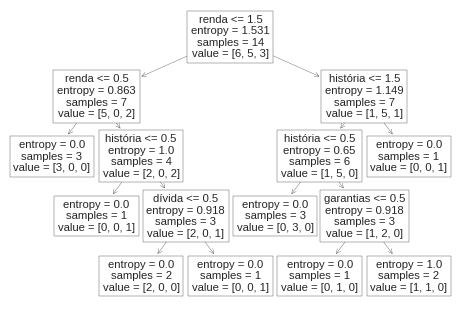

In [946]:
previsores = ['história', 'dívida', 'garantias', 'renda']

tree.plot_tree(arvore_risco_credito, feature_names=previsores)

[Text(0.5, 0.9, 'renda <= 1.5\nentropy = 1.531\nsamples = 14\nvalue = [6, 5, 3]'),
 Text(0.2, 0.7, 'renda <= 0.5\nentropy = 0.863\nsamples = 7\nvalue = [5, 0, 2]'),
 Text(0.1, 0.5, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(0.3, 0.5, 'história <= 0.5\nentropy = 1.0\nsamples = 4\nvalue = [2, 0, 2]'),
 Text(0.2, 0.3, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.4, 0.3, 'dívida <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [2, 0, 1]'),
 Text(0.3, 0.1, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.5, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.8, 0.7, 'história <= 1.5\nentropy = 1.149\nsamples = 7\nvalue = [1, 5, 1]'),
 Text(0.7, 0.5, 'história <= 0.5\nentropy = 0.65\nsamples = 6\nvalue = [1, 5, 0]'),
 Text(0.6, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(0.8, 0.3, 'garantias <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 2, 0]'),
 Text(0.7, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.1, 'e

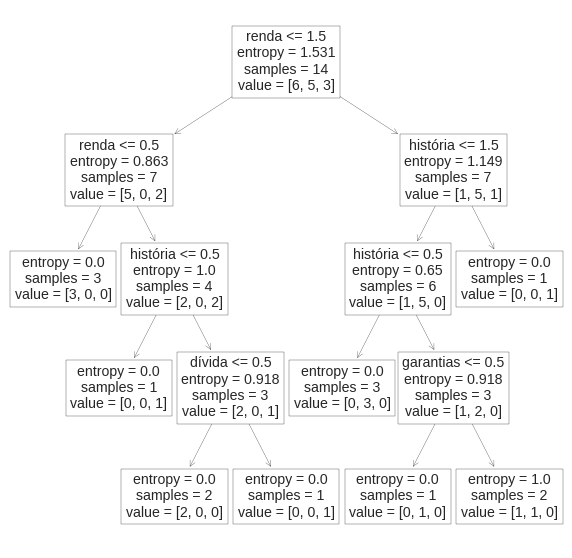

In [947]:
previsores = ['história', 'dívida', 'garantias', 'renda']

figura, eixos = matplotlib.pyplot.subplots(nrows=1, ncols=1, figsize=(10, 10))

tree.plot_tree(arvore_risco_credito, feature_names=previsores)

In [948]:
arvore_risco_credito.classes_

array(['alto', 'baixo', 'moderado'], dtype=object)

[Text(0.5, 0.9, 'renda <= 1.5\nentropy = 1.531\nsamples = 14\nvalue = [6, 5, 3]\nclass = alto'),
 Text(0.2, 0.7, 'renda <= 0.5\nentropy = 0.863\nsamples = 7\nvalue = [5, 0, 2]\nclass = alto'),
 Text(0.1, 0.5, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0, 0]\nclass = alto'),
 Text(0.3, 0.5, 'história <= 0.5\nentropy = 1.0\nsamples = 4\nvalue = [2, 0, 2]\nclass = alto'),
 Text(0.2, 0.3, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = moderado'),
 Text(0.4, 0.3, 'dívida <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [2, 0, 1]\nclass = alto'),
 Text(0.3, 0.1, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0, 0]\nclass = alto'),
 Text(0.5, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = moderado'),
 Text(0.8, 0.7, 'história <= 1.5\nentropy = 1.149\nsamples = 7\nvalue = [1, 5, 1]\nclass = baixo'),
 Text(0.7, 0.5, 'história <= 0.5\nentropy = 0.65\nsamples = 6\nvalue = [1, 5, 0]\nclass = baixo'),
 Text(0.6, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3, 0]\nclass = baixo'),
 Text

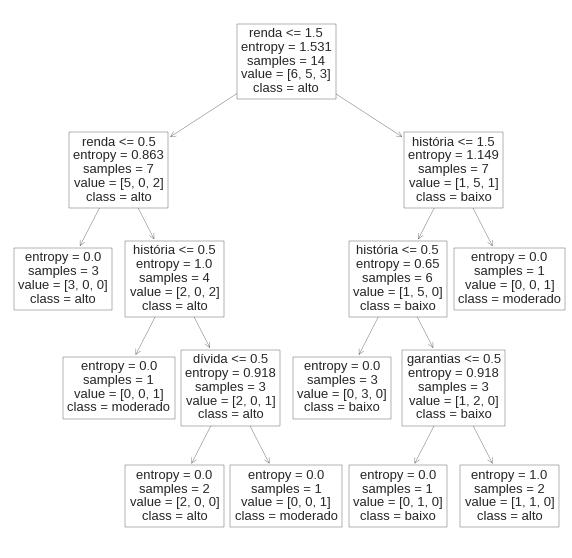

In [949]:
previsores = ['história', 'dívida', 'garantias', 'renda']

figura, eixos = matplotlib.pyplot.subplots(nrows=1, ncols=1, figsize=(10, 10))

tree.plot_tree(arvore_risco_credito, feature_names=previsores, class_names = arvore_risco_credito.classes_)

[Text(0.5, 0.9, 'renda <= 1.5\nentropy = 1.531\nsamples = 14\nvalue = [6, 5, 3]\nclass = alto'),
 Text(0.2, 0.7, 'renda <= 0.5\nentropy = 0.863\nsamples = 7\nvalue = [5, 0, 2]\nclass = alto'),
 Text(0.1, 0.5, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0, 0]\nclass = alto'),
 Text(0.3, 0.5, 'história <= 0.5\nentropy = 1.0\nsamples = 4\nvalue = [2, 0, 2]\nclass = alto'),
 Text(0.2, 0.3, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = moderado'),
 Text(0.4, 0.3, 'dívida <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [2, 0, 1]\nclass = alto'),
 Text(0.3, 0.1, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0, 0]\nclass = alto'),
 Text(0.5, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = moderado'),
 Text(0.8, 0.7, 'história <= 1.5\nentropy = 1.149\nsamples = 7\nvalue = [1, 5, 1]\nclass = baixo'),
 Text(0.7, 0.5, 'história <= 0.5\nentropy = 0.65\nsamples = 6\nvalue = [1, 5, 0]\nclass = baixo'),
 Text(0.6, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3, 0]\nclass = baixo'),
 Text

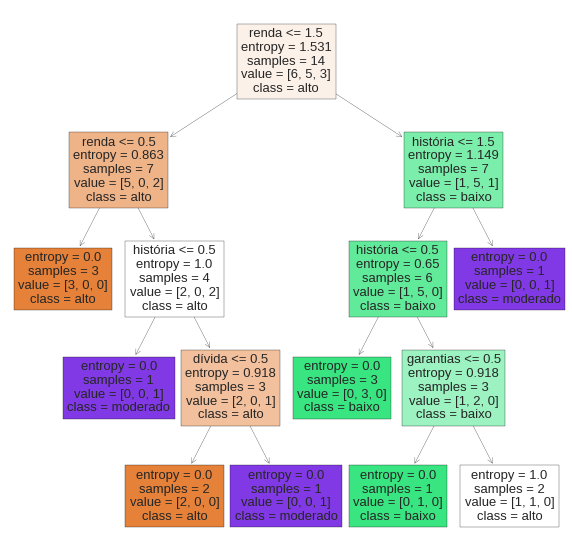

In [950]:
previsores = ['história', 'dívida', 'garantias', 'renda']

figura, eixos = matplotlib.pyplot.subplots(nrows=1, ncols=1, figsize=(10, 10))

tree.plot_tree(arvore_risco_credito, feature_names=previsores, class_names = arvore_risco_credito.classes_, filled=True)

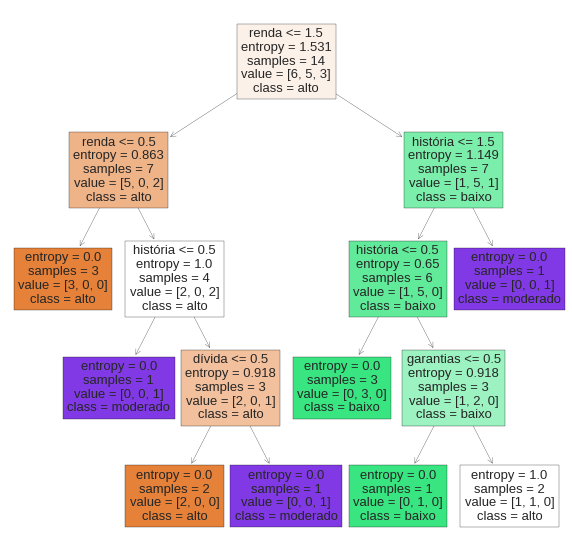

In [951]:
previsores = ['história', 'dívida', 'garantias', 'renda']

figura, eixos = matplotlib.pyplot.subplots(nrows=1, ncols=1, figsize=(10, 10))

tree.plot_tree(arvore_risco_credito, feature_names=previsores, class_names = arvore_risco_credito.classes_, filled=True); # o ; remove os textos redundantes

In [952]:
# história boa, dívida alta, garantias nenhuma, renda > 35
# história ruim, dívida alta, garantias adequada, renda < 15

previsoes = arvore_risco_credito.predict([[0, 0, 1, 2], [2, 0, 0, 0]])
previsoes

array(['baixo', 'alto'], dtype=object)

#### Base credit data

In [953]:
import pickle

with open('credit.pkl', 'rb') as f:
    X_credit_treinamento, Y_credit_treinamento, X_credit_teste, Y_credit_teste = pickle.load(f)

In [954]:
arvore_credit = DecisionTreeClassifier(criterion='entropy', random_state=0)

In [955]:
arvore_credit.fit(X_credit_treinamento, Y_credit_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [956]:
previsoes = arvore_credit.predict(X_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [957]:
Y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [958]:
accuracy = accuracy_score(Y_credit_teste, previsoes)
accuracy

0.982

0.982

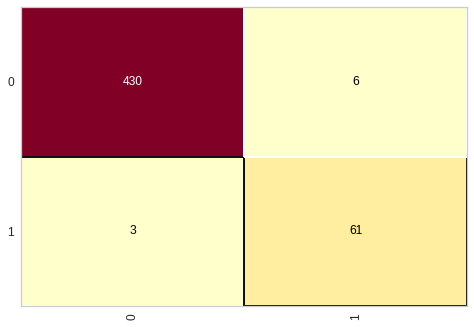

In [959]:
cm = ConfusionMatrix(arvore_credit)
cm.fit(X_credit_treinamento, Y_credit_treinamento)
cm.score(X_credit_teste, Y_credit_teste)

In [960]:
print(classification_report(Y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.91      0.95      0.93        64

    accuracy                           0.98       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500



In [961]:
arvore_credit.classes_

array([0, 1])

In [962]:
str(arvore_credit.classes_)

'[0 1]'

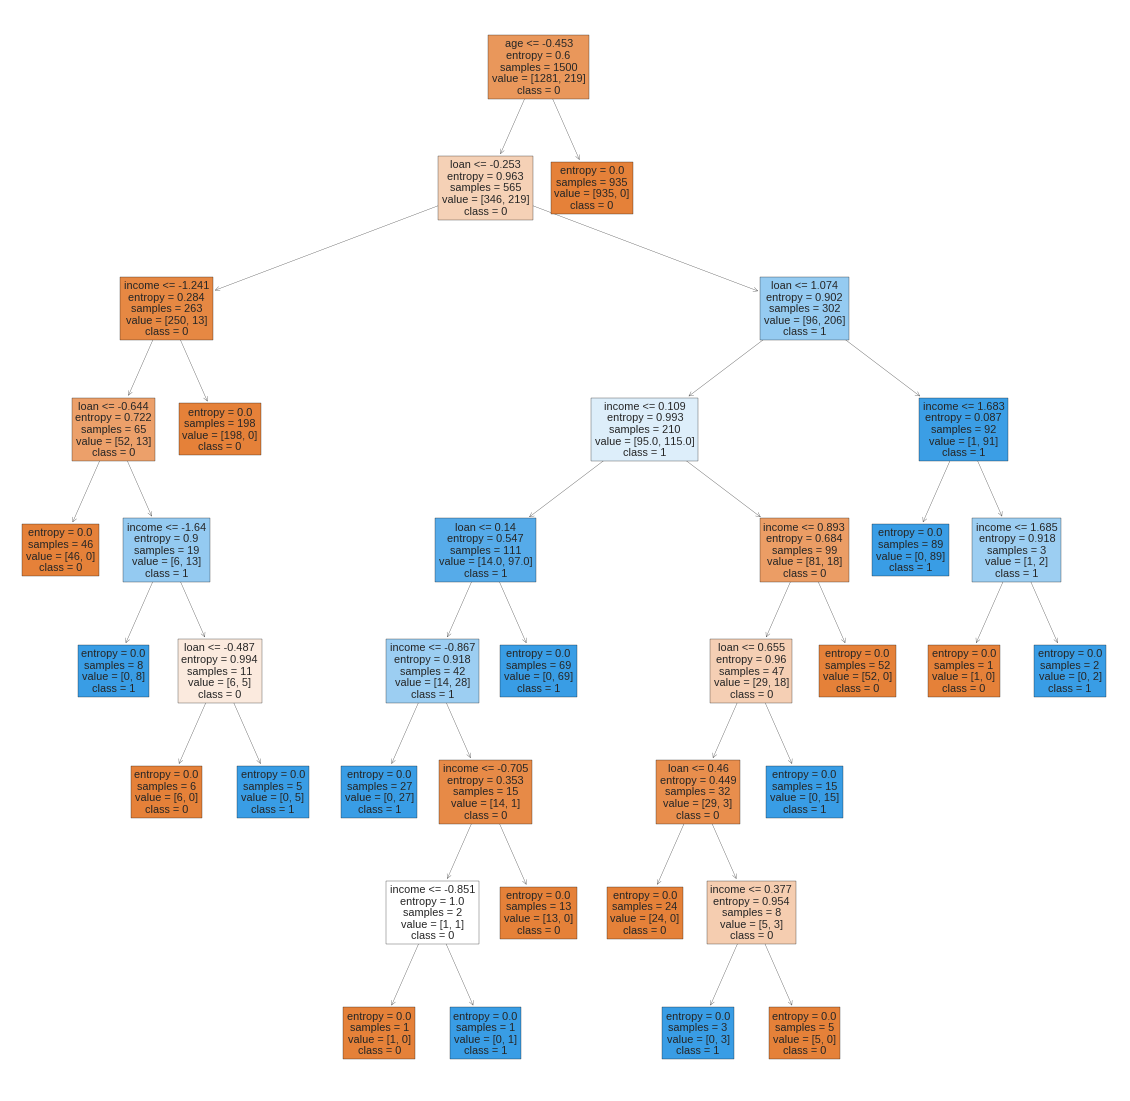

In [963]:
previsores = ['income', 'age', 'loan']

# Converta as classes para uma lista
class_names_list = [str(classe) for classe in arvore_credit.classes_]

fig, axes = matplotlib.pyplot.subplots(nrows=1, ncols=1, figsize=(20, 20))
tree.plot_tree(arvore_credit, feature_names=previsores, class_names=class_names_list, filled=True)

fig.savefig('arvore_credit.png')


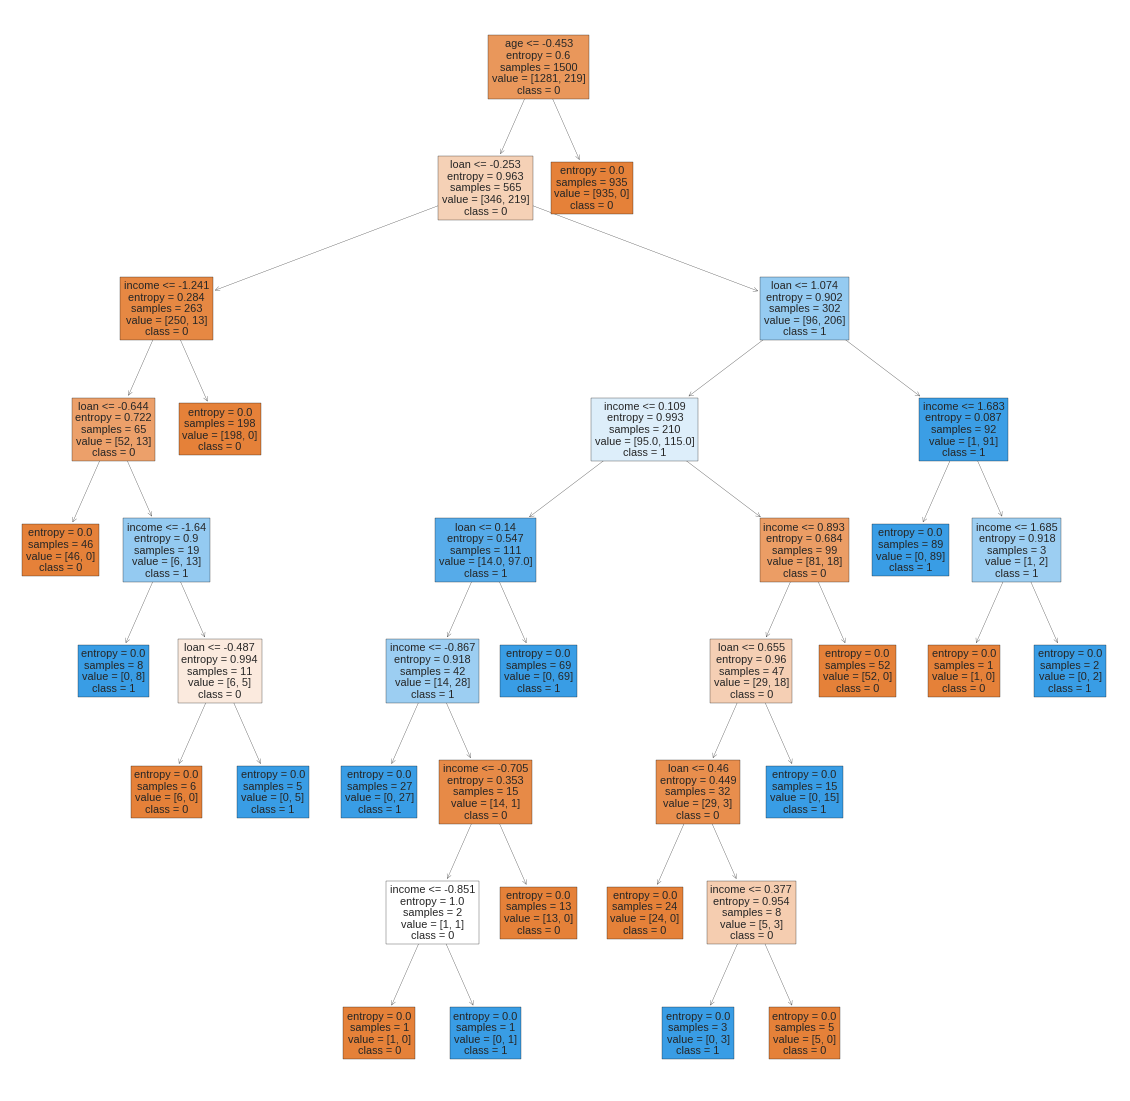

In [964]:
previsores = ['income', 'age', 'loan']

fig, axes = matplotlib.pyplot.subplots(nrows=1, ncols=1, figsize=(20, 20))
tree.plot_tree(arvore_credit, feature_names=previsores, class_names=['0', '1'], filled=True)

fig.savefig('arvore_credit2.png')

#### Base census